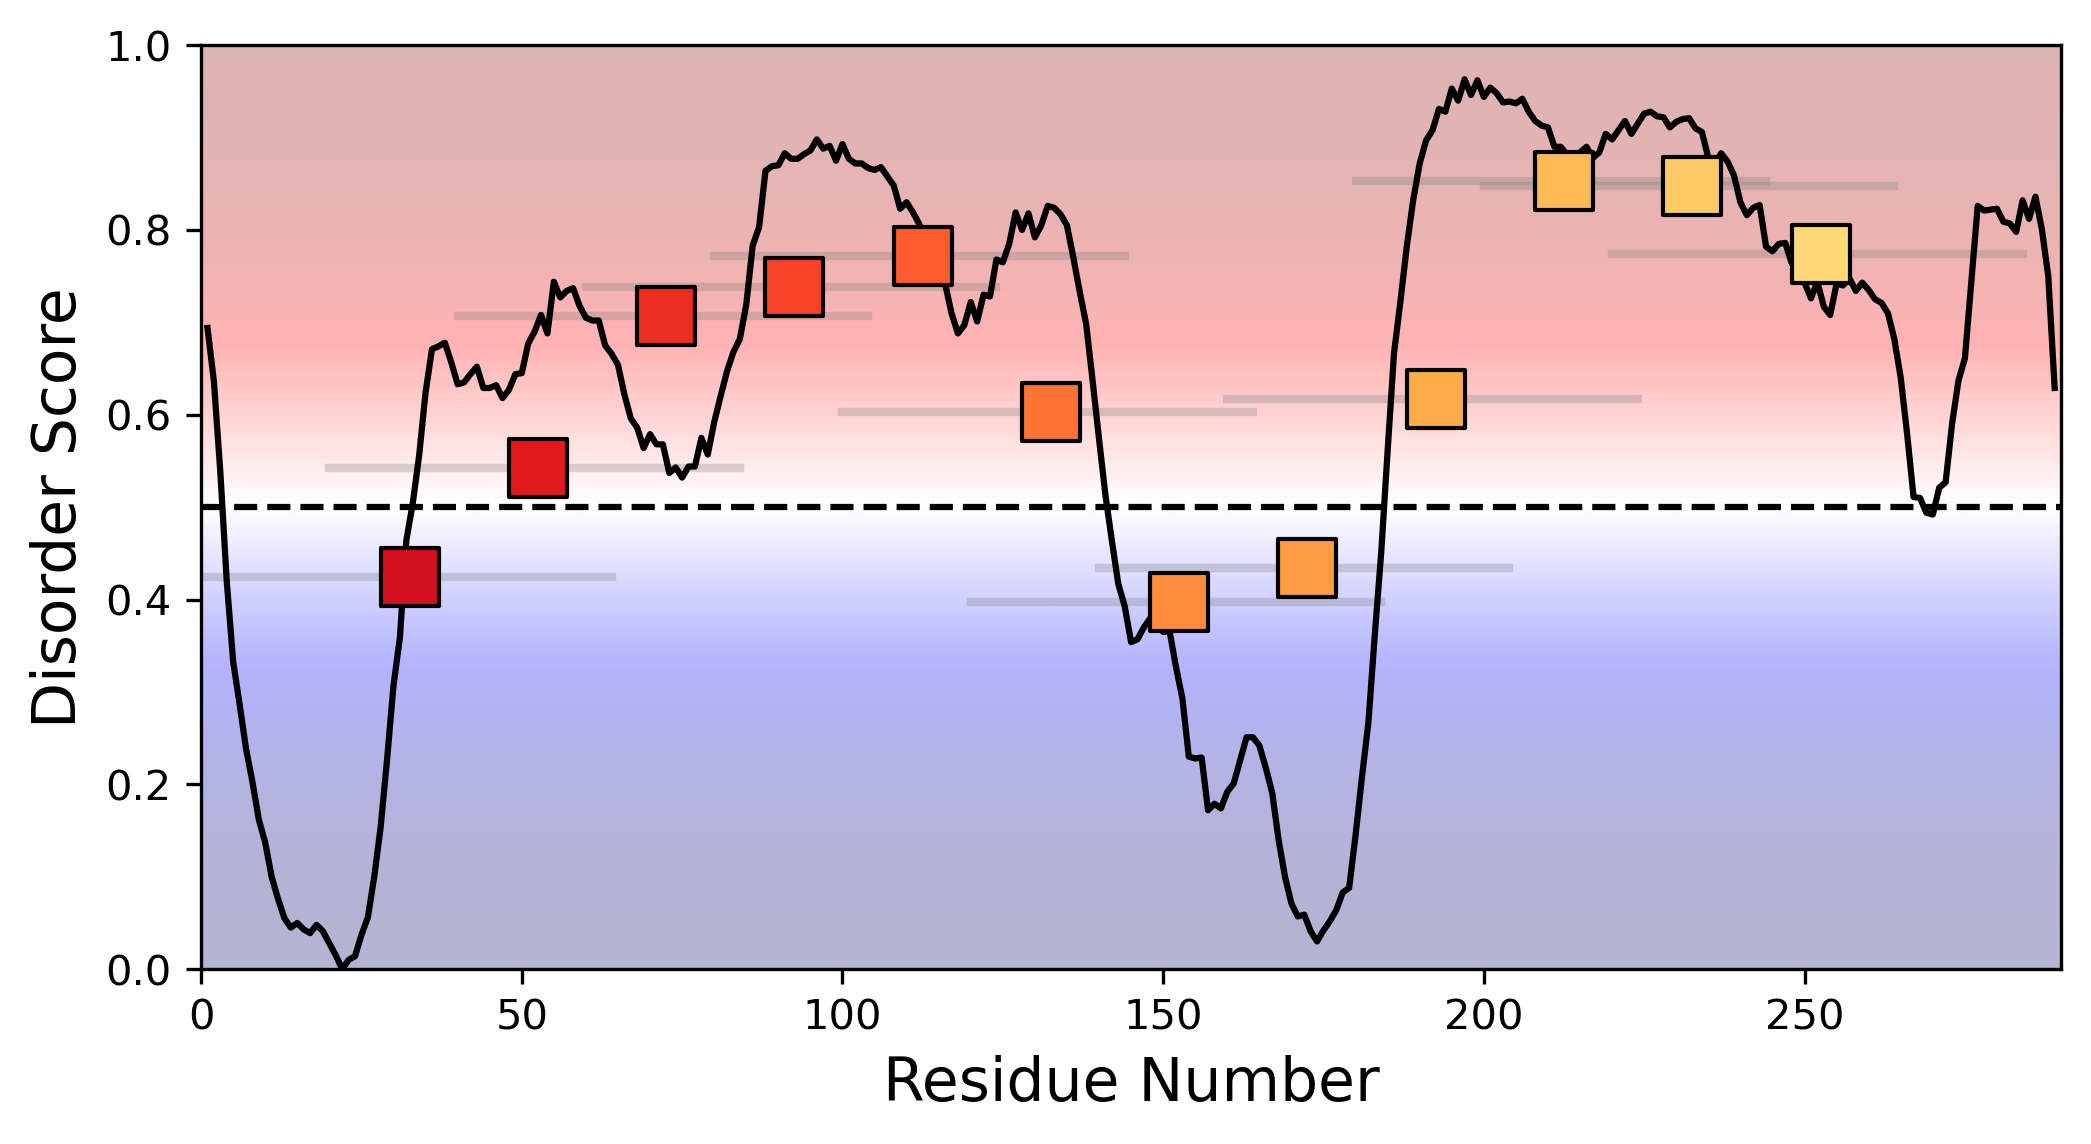

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import numpy as np

path=r'D:\Patrick\Disorder_data\\'
e1a_file = glob.glob(path+'*.csv')
all_df = pd.DataFrame()

e1a_df=pd.DataFrame()
for i, e1a in enumerate(e1a_file):
    df= pd.read_csv(e1a)
    df['sequence'] = e1a.split('\\')[-1].split('_')[0]
    e1a_df = pd.concat([e1a_df, df], ignore_index=True)
    
full_length = e1a_df.loc[(e1a_df['sequence']=='E1A')]
tile_df = e1a_df.loc[(e1a_df['sequence']!='E1A')]

full_length_prection = pd.DataFrame()
for i in range(12):
    start = i*20
    end = start+64
    tmp= full_length[start:end]
    tmp_disorder = pd.DataFrame({' Disorder':[tmp[' Disorder'].mean()],
                                 ' Index': [tmp[' Index'].median()]})
    tmp_disorder['sequence'] = 'E1A'+str(start+1)+'-'+str(end)
    
    tmp_disorder['start'] = start
    tmp_disorder['end'] = end
    tmp_disorder['construct'] = str(i+1)
    
    full_length_prection = pd.concat([full_length_prection, tmp_disorder])
full_length_prediction = full_length_prection.reset_index(drop=True)

N=12
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.YlOrRd(np.linspace(0.8, 0.25, N)))
fig, ax = plt.subplots(figsize=(8, 4))

generator = tile_df.groupby('sequence')
pos= []

"""
for i, df_item in enumerate(generator):
    df = df_item[1]
    middle = df[' Index'].median() +20* i 
    avg = df[' Disorder'].mean()
    ax.scatter(middle, avg, marker='s', s=200, edgecolors='black')
"""    
Tile_sort_values = []

generator = full_length_prediction.groupby('sequence')    

for i, row in full_length_prediction.iterrows():
    middle = row.iloc[1]
    avg = row.iloc[0]
    start = row.iloc[3]
    end= row.iloc[4]
    
    ax.plot([start, end], [avg, avg], color='gray', linewidth=2, alpha=0.3)
    ax.scatter(middle, avg, marker='s', s=200, edgecolors='black', zorder=3)
    
    
ax.plot(full_length[' Index'], full_length[' Disorder'], c='black')
ax.set_xlabel(xlabel='Residue Number', fontsize='x-large')
ax.set_ylabel(ylabel='Disorder Score', fontsize='x-large')
#ax.text(5, 0.9, 'DISORDERED')
#ax.text(250, 0.1, 'ORDERED')
ax.axhline(0.5, linestyle='--', c='black')
# ax.imshow([[0.5, 0.5], [0, 300]], cmap=plt.cm.seismic)
xmin, xmax = xlim = 0, 290
ymin, ymax = ylim = 0, 1
ax.imshow([[1, 1], [0, 0]], cmap=plt.cm.seismic, extent=(xmin, xmax, ymin, ymax), alpha=0.3, interpolation='bicubic')
ax.set_aspect('auto')

plt.savefig(r'D:\Patrick\Disorder_data\disorder_plot_fulllength.svg', format='svg')

In [ ]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.YlOrRd(np.linspace(0.7, 0.25, N)))
plt.figure(dpi=1000)
fig, ax = plt.subplots(figsize=(4, 8))
ax.text(0.65, 15, 'DISORDERED')
ax.text(0.1, 275, 'ORDERED')
generator = tile_df.groupby('sequence')
pos= []


for i, df_item in enumerate(generator):
    df = df_item[1]
    middle = df[' Index'].median() +20* i 
    avg = df[' Disorder'].mean()
    ax.scatter(avg, middle, marker='s', s=200, edgecolors='black')
    
generator = full_length_prection.groupby('sequence')  
    
for i, df_item in enumerate(generator):
    df = df_item[1]
    middle = df[' Index']
    avg = df[' Disorder'].mean()
    ax.scatter(avg, middle, marker='s', s=200, edgecolors='black', linewidths=1.5, linestyle='dashed', facecolors='none')

ax.plot(full_length[' Disorder'], full_length[' Index'], c='black', linestyle='-.')
ax.set_ylabel(ylabel='Residue Number', fontsize='x-large')
ax.set_xlabel(xlabel='Disorder Score', fontsize='x-large')
ax.axvline(0.5, linestyle='--', c='black')
# ax.imshow([[0.5, 0.5], [0, 300]], cmap=plt.cm.seismic)
xmin, xmax = xlim = 0, 1
ymin, ymax = ylim = 0, 300
ax.imshow([[0, 1], [0, 1]], cmap=plt.cm.seismic, extent=(xmin, xmax, ymin, ymax), alpha=0.15, interpolation='bicubic')
ax.set_aspect('auto')

#plt.savefig(r'D:\OneDrive\Virus\Paper1_figures\disorder_plot_withfulllengthavg.svg', format='svg')


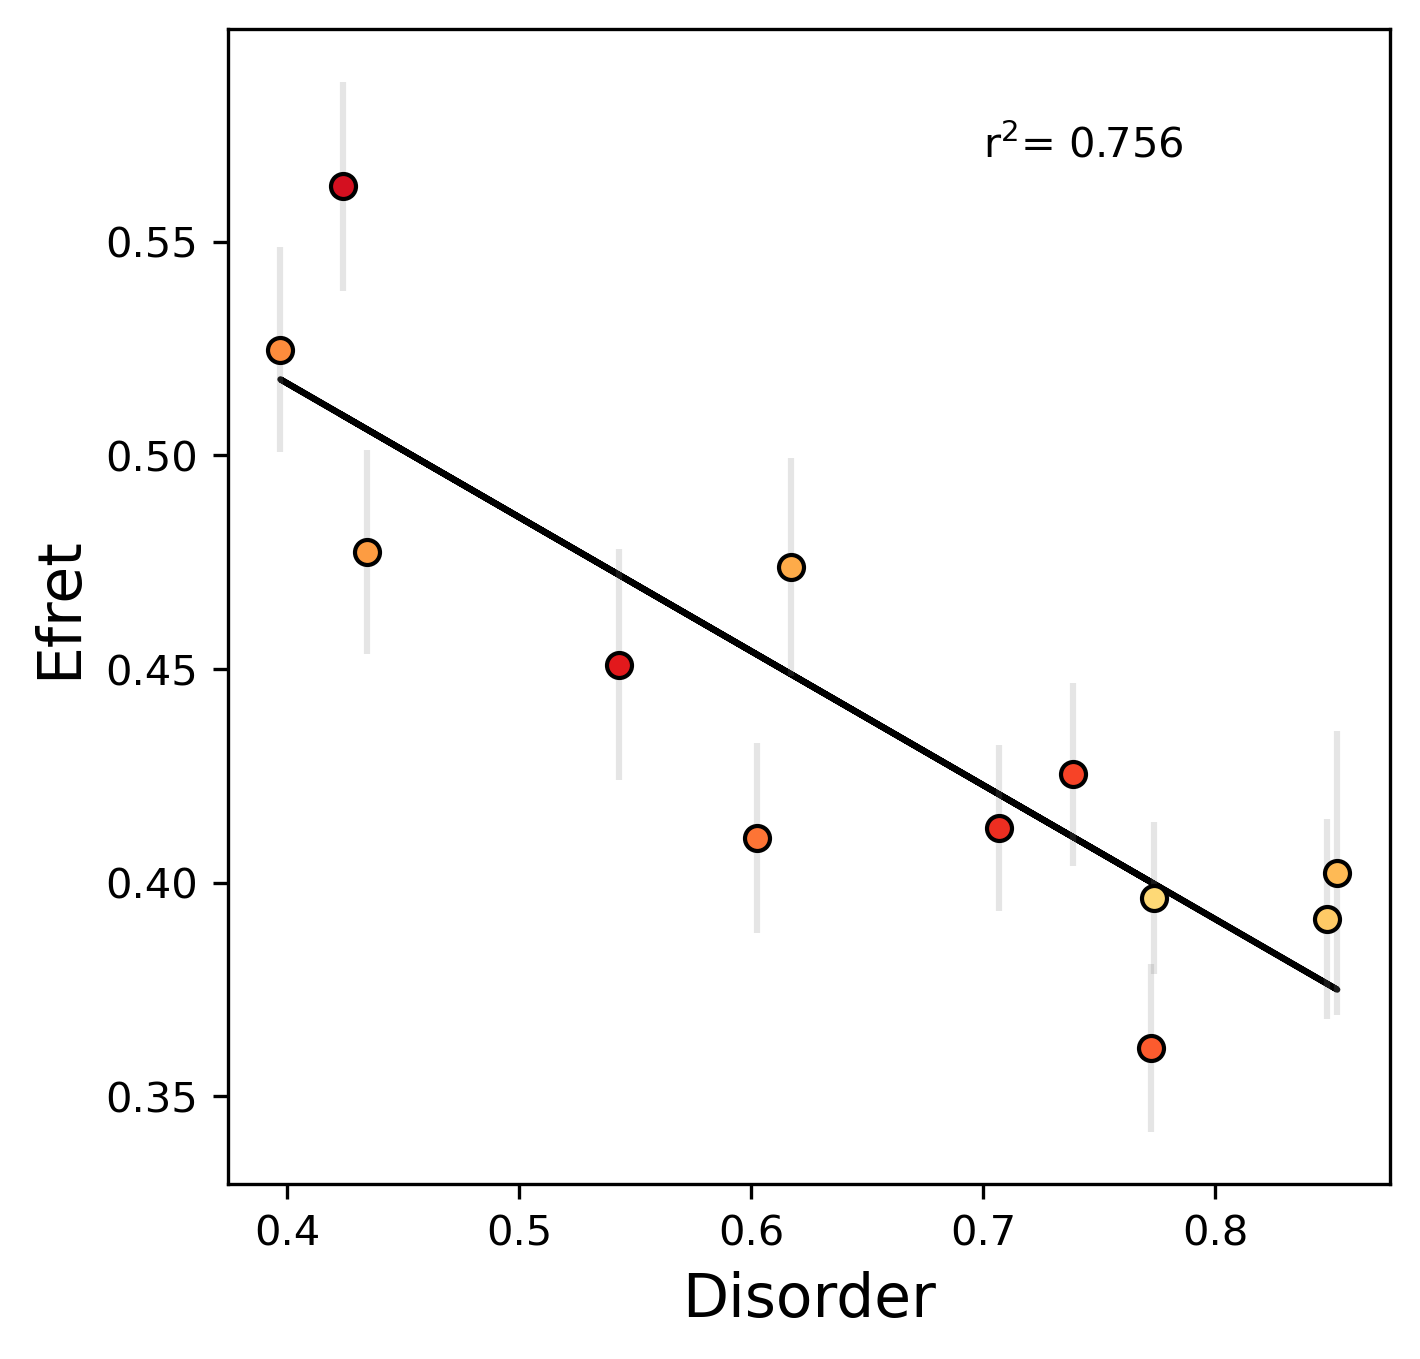

In [81]:
#Disorder vs Basal Efret Data, get data from growth cells at time point 6.
from scipy import stats
basal_cell_df = pd.read_csv(r'D:/Patrick/dataframes/basal_cell_df.csv')

Efret_median = basal_cell_df.groupby(['construct'], as_index=False, observed=True)['Efret'].median()
Efret_std = basal_cell_df.groupby(['construct'], as_index=False, observed=True)['Efret'].std()

Efret_std =Efret_std.rename(columns= {'Efret': 'std'})


Efret_median['construct'] = Efret_median['construct'].astype(str)
Efret_std['construct'] = Efret_std['construct'].astype(str)

merged_df = pd.merge(Efret_median, full_length_prediction, on='construct')
merged_df = pd.merge(merged_df, Efret_std, on='construct')

x= merged_df[' Disorder']
y=merged_df['Efret']
error = merged_df['std']

fig, ax  = plt.subplots(figsize=(5, 5))
mpl.rcParams['figure.dpi'] = 300
res = stats.linregress(x, y)

ax.plot(x, res.intercept + res.slope*x, 'k')
for i, b, e in zip(x, y, error):
    ax.scatter(x=i, y=b, edgecolors='k', zorder=3) 
    ax.errorbar(x=i, y=b, yerr=e, c='gray', alpha=0.2)

r_squared = res.rvalue **2

ax.text(0.7, 0.57, f'r$^2$= {round(r_squared, 3)}')
ax.set_ylabel('Efret', fontsize='x-large')
ax.set_xlabel('Disorder', fontsize='x-large')
plt.savefig(r'D:/Patrick/Disorder_vs_Efret_plot.svg', format='svg', bbox_inches='tight')
merged_df.to_csv(r'D:/Patrick/dataframes/disorder_basal_df.csv')

0
1
2
3
4
5
6
7
8
9
10
11
